In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

import mpld3
mpld3.enable_notebook()
from mpld3 import plugins

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 738469/738469 [00:01<00:00, 600484.77it/s]


In [6]:
data1970 = data[data.PubYear_x == 1970]
data1990 = data[data.PubYear_x == 1990]
data2000 = data[data.PubYear_x == 2000]
data2010 = data[data.PubYear_x == 2010]

data1970_ch = data1970.groupby(['character_count']).size().reset_index(name='counts70')
data1990_ch = data1990.groupby(['character_count']).size().reset_index(name='counts90')
data2000_ch = data2000.groupby(['character_count']).size().reset_index(name='counts00')
data2010_ch = data2010.groupby(['character_count']).size().reset_index(name='counts10')

data1970_words = data1970.groupby(['word_count']).size().reset_index(name='counts70')
data1990_words = data1990.groupby(['word_count']).size().reset_index(name='counts90')
data2000_words = data2000.groupby(['word_count']).size().reset_index(name='counts00')
data2010_words = data2010.groupby(['word_count']).size().reset_index(name='counts10')

data1970_t_wt_stp = data1970.groupby(['title_without_stopwords']).size().reset_index(name='counts70')
data1990_t_wt_stp = data1990.groupby(['title_without_stopwords']).size().reset_index(name='counts90')
data2000_t_wt_stp = data2000.groupby(['title_without_stopwords']).size().reset_index(name='counts00')
data2010_t_wt_stp = data2010.groupby(['title_without_stopwords']).size().reset_index(name='counts10')

f1 = plt.figure(figsize=(14,6))
ax11 = f1.add_subplot(121)
ax12 = f1.add_subplot(122)

ax11.set_xlabel("Character count")
ax11.set_ylabel("Number of publications")

ax12.set_xlabel("Word Count")
ax12.set_ylabel("Number of publications")

plugins.clear(f1)  # clear all plugins from the figure

line = ax11.plot(data1970_ch['character_count'], data1970_ch['counts70'], 'r', label="1970")
line = ax12.plot(data1970_words['word_count'], data1970_words['counts70'], 'r', label="1970")

line = ax11.plot(data1990_ch['character_count'], data1990_ch['counts90'], 'b', label="1990")
line = ax12.plot(data1990_words['word_count'], data1990_words['counts90'], 'b', label="1990")


line = ax11.plot(data2000_ch['character_count'], data2000_ch['counts00'], 'g', label="2000")
line = ax12.plot(data2000_words['word_count'], data2000_words['counts00'], 'g', label="2000")


line = ax11.plot(data2010_ch['character_count'], data2010_ch['counts10'], 'y', label="2010")
line = ax12.plot(data2010_words['word_count'], data2010_words['counts10'], 'y', label="2010")
mpld3.plugins.connect(f1, mpld3.plugins.LineLabelTooltip(line[0], label='2010'))

ax11.legend()
ax12.legend()

mpld3.display()

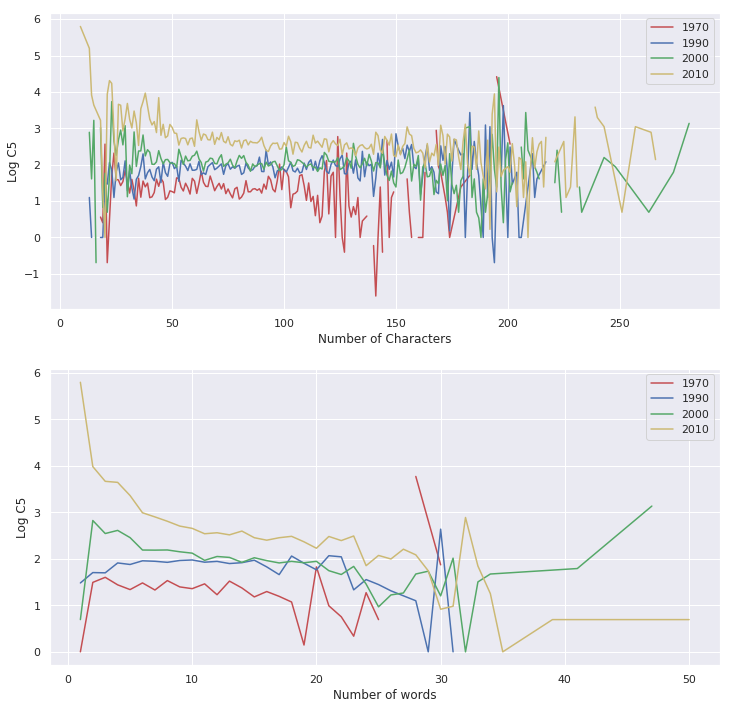

In [7]:
f1 = plt.figure(figsize=(12,12))
ax13 = f1.add_subplot(211)
ax14 = f1.add_subplot(212)

data1970_avg_c5_for_character_count = data1970.groupby(['character_count'], as_index=False)['c5'].mean()
data1970_avg_c5_for_character_count['avg_log_c5'] = data1970_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax13.plot(data1970_avg_c5_for_character_count['character_count'], 
          data1970_avg_c5_for_character_count['avg_log_c5'],
         'r', 
          label="1970")

data1990_avg_c5_for_character_count = data1990.groupby(['character_count'], as_index=False)['c5'].mean()
data1990_avg_c5_for_character_count['avg_log_c5'] = data1990_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax13.plot(data1990_avg_c5_for_character_count['character_count'], 
          data1990_avg_c5_for_character_count['avg_log_c5'],
         'b', 
          label="1990")

data2000_avg_c5_for_character_count = data2000.groupby(['character_count'], as_index=False)['c5'].mean()
data2000_avg_c5_for_character_count['avg_log_c5'] = data2000_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax13.plot(data2000_avg_c5_for_character_count['character_count'], 
          data2000_avg_c5_for_character_count['avg_log_c5'],
         'g', 
          label="2000")

data2010_avg_c5_for_character_count = data2010.groupby(['character_count'], as_index=False)['c5'].mean()
data2010_avg_c5_for_character_count['avg_log_c5'] = data2010_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax13.plot(data2010_avg_c5_for_character_count['character_count'], 
          data2010_avg_c5_for_character_count['avg_log_c5'],
         'y', 
          label="2010")

ax13.set_xlabel("Number of Characters")
ax13.set_ylabel("Log C5")
ax13.legend()


data1970_avg_c5_for_word_count = data1970.groupby(['word_count'], as_index=False)['c5'].mean()
data1970_avg_c5_for_word_count['avg_log_c5'] = data1970_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax14.plot(data1970_avg_c5_for_word_count['word_count'], 
          data1970_avg_c5_for_word_count['avg_log_c5'],
         'r', 
          label="1970")

data1990_avg_c5_for_word_count = data1990.groupby(['word_count'], as_index=False)['c5'].mean()
data1990_avg_c5_for_word_count['avg_log_c5'] = data1990_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax14.plot(data1990_avg_c5_for_word_count['word_count'], 
          data1990_avg_c5_for_word_count['avg_log_c5'],
         'b', 
          label="1990")

data2000_avg_c5_for_word_count = data2000.groupby(['word_count'], as_index=False)['c5'].mean()
data2000_avg_c5_for_word_count['avg_log_c5'] = data2000_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax14.plot(data2000_avg_c5_for_word_count['word_count'], 
          data2000_avg_c5_for_word_count['avg_log_c5'],
         'g', 
          label="2000")

data2010_avg_c5_for_word_count = data2010.groupby(['word_count'], as_index=False)['c5'].mean()
data2010_avg_c5_for_word_count['avg_log_c5'] = data2010_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax14.plot(data2010_avg_c5_for_word_count['word_count'], 
          data2010_avg_c5_for_word_count['avg_log_c5'],
         'y', 
          label="2010")

ax14.set_xlabel("Number of words")
ax14.set_ylabel("Log C5")
ax14.legend()